<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together. 

# Import Libraries and Export Images from Zip_File

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [ ]:
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

# Unzip the file
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/cat_dog_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [ ]:
my_data_dir = ("data")

In [ ]:
os.listdir(my_data_dir) 

['validation', 'train', 'test']

In [ ]:
test_path = my_data_dir + '/validation/'
train_path = my_data_dir + '/train/'

In [ ]:
os.listdir(test_path)

['dog', 'cat']

In [ ]:
os.listdir(train_path)

['dog', 'cat']

In [ ]:
import pathlib

data_dir = pathlib.Path(train_path) # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cat' 'dog']


In [ ]:
class_names

array(['cat', 'dog'], dtype='<U3')

**Let's check how many images there are.**

In [ ]:
os.listdir(train_path+'cat')

['cat.11796.jpg',
 'cat.11440.jpg',
 'cat.11868.jpg',
 'cat.3340.jpg',
 'cat.12282.jpg',
 'cat.8613.jpg',
 'cat.529.jpg',
 'cat.9723.jpg',
 'cat.10807.jpg',
 'cat.10256.jpg',
 'cat.1499.jpg',
 'cat.4384.jpg',
 'cat.364.jpg',
 'cat.3520.jpg',
 'cat.2616.jpg',
 'cat.7124.jpg',
 'cat.5300.jpg',
 'cat.204.jpg',
 'cat.3993.jpg',
 'cat.8112.jpg',
 'cat.4124.jpg',
 'cat.564.jpg',
 'cat.18.jpg',
 'cat.6058.jpg',
 'cat.8016.jpg',
 'cat.11182.jpg',
 'cat.4869.jpg',
 'cat.10479.jpg',
 'cat.5647.jpg',
 'cat.3105.jpg',
 'cat.3770.jpg',
 'cat.5590.jpg',
 'cat.2337.jpg',
 'cat.10615.jpg',
 'cat.7207.jpg',
 'cat.6903.jpg',
 'cat.3954.jpg',
 'cat.10347.jpg',
 'cat.6027.jpg',
 'cat.12418.jpg',
 'cat.7821.jpg',
 'cat.10315.jpg',
 'cat.11893.jpg',
 'cat.11109.jpg',
 'cat.1575.jpg',
 'cat.8498.jpg',
 'cat.5962.jpg',
 'cat.11317.jpg',
 'cat.11266.jpg',
 'cat.4590.jpg',
 'cat.2966.jpg',
 'cat.3564.jpg',
 'cat.7714.jpg',
 'cat.10133.jpg',
 'cat.10743.jpg',
 'cat.2564.jpg',
 'cat.4231.jpg',
 'cat.443.jpg',
 'c

In [ ]:
len(os.listdir(train_path+'cat')), len(os.listdir(train_path+'dog'))

(12500, 5026)

In [ ]:
len(os.listdir(test_path+'cat')), len(os.listdir(test_path+'dog'))

(1219, 1071)

In [ ]:
for dirpath, dirnames, filenames in os.walk(my_data_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1071 images in 'data/validation/dog'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 0 directories and 12500 images in 'data/train/cat'.
There are 0 directories and 6897 images in 'data/test'.


**Let's take an example images from both train-cat and train-dog folders to observe process** 

In [ ]:
os.listdir(train_path+'cat')[:10]

['cat.11796.jpg',
 'cat.11440.jpg',
 'cat.11868.jpg',
 'cat.3340.jpg',
 'cat.12282.jpg',
 'cat.8613.jpg',
 'cat.529.jpg',
 'cat.9723.jpg',
 'cat.10807.jpg',
 'cat.10256.jpg']

In [ ]:
os.listdir(train_path+'cat')[10]

'cat.1499.jpg'

In [ ]:
cat_cell_path = train_path+'cat'+'/cat.8372.jpg'

In [ ]:
cat_cell_path

'data/train/cat/cat.8372.jpg'

In [ ]:
imread(cat_cell_path)

array([[[ 27,  34,  44],
        [ 23,  30,  40],
        [ 31,  35,  44],
        ...,
        [ 36,  31,  27],
        [ 29,  24,  20],
        [ 25,  20,  16]],

       [[ 21,  30,  39],
        [ 19,  28,  37],
        [ 25,  32,  40],
        ...,
        [ 36,  31,  25],
        [ 29,  24,  18],
        [ 25,  20,  14]],

       [[ 16,  26,  35],
        [ 17,  27,  36],
        [ 24,  33,  40],
        ...,
        [ 36,  31,  25],
        [ 29,  24,  18],
        [ 25,  20,  14]],

       ...,

       [[221, 215, 217],
        [222, 216, 218],
        [222, 216, 218],
        ...,
        [192, 182, 190],
        [192, 182, 190],
        [192, 182, 190]],

       [[220, 214, 216],
        [220, 214, 216],
        [221, 215, 217],
        ...,
        [189, 179, 187],
        [189, 179, 187],
        [189, 179, 187]],

       [[219, 213, 215],
        [220, 214, 216],
        [220, 214, 216],
        ...,
        [184, 174, 182],
        [184, 174, 182],
        [184, 174, 182]]

In [ ]:
cat_cell= imread(cat_cell_path)

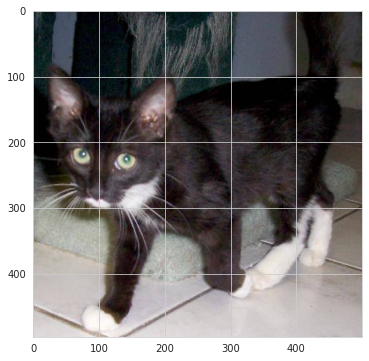

In [ ]:
plt.imshow(cat_cell);

In [ ]:
cat_cell.shape

(496, 500, 3)

In [ ]:
os.listdir(train_path+'dog')[:10]

['dog.10635.jpg',
 'dog.10965.jpg',
 'dog.12449.jpg',
 'dog.11289.jpg',
 'dog.1072.jpg',
 'dog.11467.jpg',
 'dog.11046.jpg',
 'dog.11236.jpg',
 'dog.12261.jpg',
 'dog.1995.jpg']

In [ ]:
dog_cell_path = train_path+'dog/'+os.listdir(train_path+'dog')[10]

In [ ]:
imread(dog_cell_path)

array([[[178, 144, 117],
        [176, 142, 115],
        [172, 138, 111],
        ...,
        [138, 107,  86],
        [138, 107,  86],
        [138, 107,  86]],

       [[173, 139, 112],
        [171, 137, 110],
        [167, 133, 106],
        ...,
        [138, 107,  86],
        [138, 107,  86],
        [138, 107,  86]],

       [[168, 134, 107],
        [166, 132, 105],
        [163, 129, 102],
        ...,
        [137, 109,  87],
        [137, 109,  87],
        [137, 109,  87]],

       ...,

       [[ 87, 107, 118],
        [ 84, 104, 115],
        [ 77,  99, 112],
        ...,
        [ 71,  97, 114],
        [ 71,  97, 114],
        [ 71,  97, 114]],

       [[ 95, 115, 126],
        [ 91, 111, 122],
        [ 83, 105, 118],
        ...,
        [ 71,  97, 114],
        [ 71,  97, 114],
        [ 71,  97, 114]],

       [[ 93, 113, 124],
        [ 89, 109, 120],
        [ 82, 104, 117],
        ...,
        [ 71,  97, 114],
        [ 71,  97, 114],
        [ 71,  97, 114]]

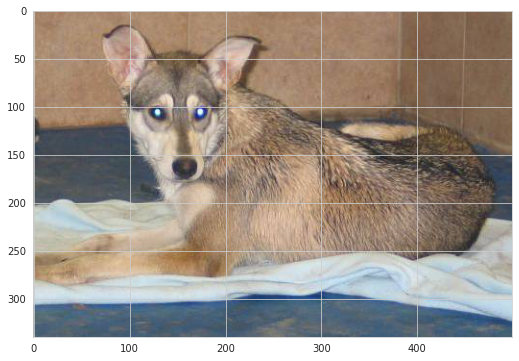

In [ ]:
dog_cell = imread(dog_cell_path)
plt.imshow(dog_cell);

In [ ]:
dog_cell.shape

(340, 499, 3)

In [ ]:
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (260, 339, 3)


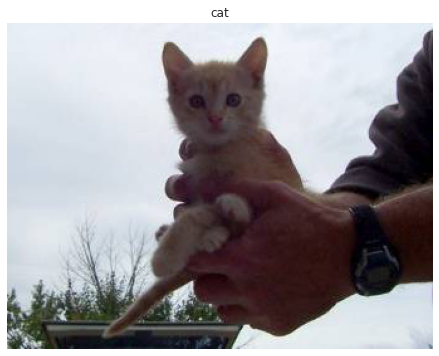

In [ ]:
img = view_random_image(target_dir=train_path,
                        target_class="cat")

Image shape: (499, 417, 3)


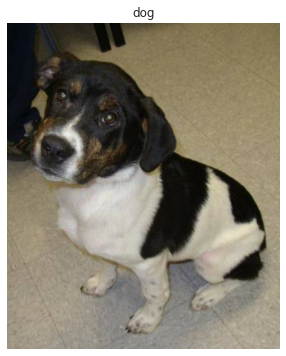

In [ ]:
img = view_random_image(target_dir=train_path,
                        target_class="dog")

Image shape: (293, 263, 3)


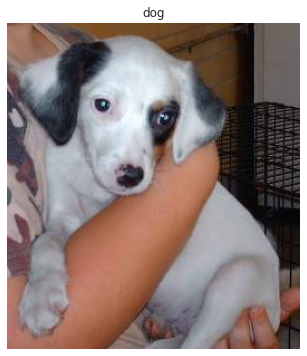

In [ ]:
import random
img = view_random_image(target_dir=train_path,
                        target_class=random.choice(class_names)) # get a random class name

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [ ]:
dog_cell.shape

(340, 499, 3)

In [ ]:
cat_cell.shape

(496, 500, 3)

In [ ]:
x = [imread(train_path+'dog/'+image).shape[0] for image in os.listdir(train_path+'dog')] 
y = [imread(train_path+'dog/'+image).shape[1] for image in os.listdir(train_path+'dog')] 

In [ ]:
x[:10]

[499, 375, 374, 399, 417, 224, 499, 500, 499, 375]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


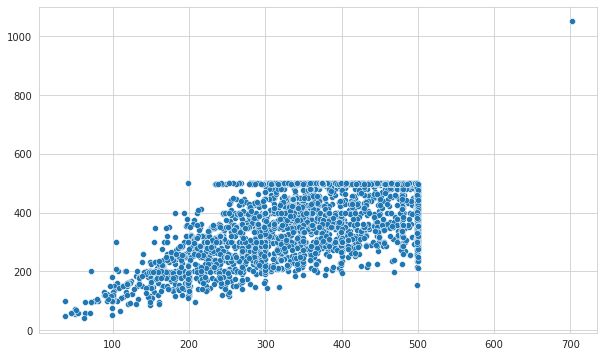

In [ ]:
sns.scatterplot(x,y);

In [ ]:
np.mean(x), np.median(x)

(365.0505372065261, 374.0)

In [ ]:
np.mean(y), np.median(y)

(398.9930362116992, 426.0)

In [ ]:
image_shape = (360,360,3)

## Scalling

**Let's check the images if they are needed to be scaled or not**

In [ ]:
dog_cell.max()

255

In [ ]:
cat_cell.max()

255

In [ ]:
dog_cell.min()

9

In [ ]:
cat_cell.min()

0

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

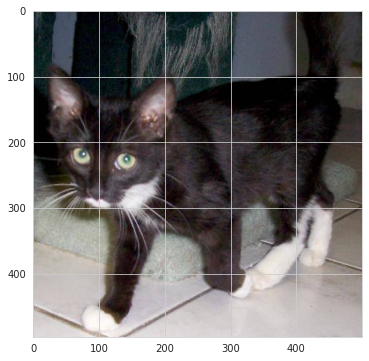

In [ ]:
plt.imshow(cat_cell);

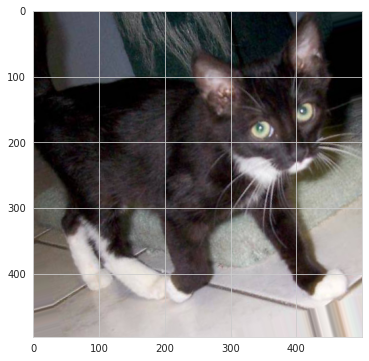

In [ ]:
plt.imshow(image_gen.random_transform(cat_cell));

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [ ]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2290 images belonging to 2 classes.


In [ ]:
batch_size = 32

In [ ]:
image_shape

(360, 360, 3)

In [ ]:
train_image_gen = image_gen.flow_from_directory(directory=train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=True)

Found 17526 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(directory=test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                               shuffle=False)

Found 2290 images belonging to 2 classes.


In [ ]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
test_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
train_image_gen[0][0].shape

(32, 360, 360, 3)

In [ ]:
train_image_gen[0][0][0].shape

(360, 360, 3)

In [ ]:
len(train_image_gen), len(test_image_gen)

(548, 72)

In [ ]:
len(train_image_gen)*batch_size, len(test_image_gen)*batch_size 

(17536, 2304)

In [ ]:
# Get a sample of the training data batch 
images, labels = train_image_gen.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model1 = Sequential()

model1.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Flatten())


model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dropout(0.5))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

# optimizer = keras.optimizers.Adam(lr=0.01)
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 358, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 179, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 177, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 88, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 86, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 43, 32)      

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [ ]:
model1.fit(train_image_gen,
          epochs=10,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

Epoch 1/10
548/548 [==============================] - 1901s 3s/step - loss: 0.6055 - accuracy: 0.7163 - val_loss: 0.6583 - val_accuracy: 0.6170
Epoch 2/10
548/548 [==============================] - 1873s 3s/step - loss: 0.5472 - accuracy: 0.7414 - val_loss: 0.6130 - val_accuracy: 0.6502
Epoch 3/10
548/548 [==============================] - 1864s 3s/step - loss: 0.4988 - accuracy: 0.7654 - val_loss: 0.7267 - val_accuracy: 0.6472
Epoch 4/10
548/548 [==============================] - 1861s 3s/step - loss: 0.4700 - accuracy: 0.7816 - val_loss: 0.5533 - val_accuracy: 0.6939
Epoch 5/10
443/548 [=======================>......] - ETA: 5:35 - loss: 0.4487 - accuracy: 0.7927

In [ ]:
model1.metrics_names

In [ ]:
summary = pd.DataFrame(model1.history.history)
summary.head()

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

# Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pred_prob = model1.predict(test_image_gen)

In [ ]:
pred_prob

In [ ]:
y_pred = pred_prob > 0.5
y_pred

In [ ]:
y_test = test_image_gen.classes
y_test

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

## Modelling-2

In [ ]:
model2 = Sequential()

model2.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())


model2.add(Dense(128))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model2.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights = True)

In [ ]:
model2.fit(train_image_gen,
          epochs=8,
          steps_per_epoch=len(train_image_gen),
          validation_data=test_image_gen,
          validation_steps=len(test_image_gen),
          callbacks=[early_stop])

In [ ]:
model2.metrics_names

In [ ]:
summary = pd.DataFrame(model2.history.history)
summary.head()

In [ ]:
summary[["loss", "val_loss"]].plot();

In [ ]:
summary[["accuracy", "val_accuracy"]].plot();

## Evaluation on Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
score = model1.evaluate(test_image_gen)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
pred_prob = model1.predict(test_image_gen)
pred_prob

In [ ]:
y_pred = pred_prob > 0.5
y_pred

In [ ]:
y_test = test_image_gen.classes
y_test

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

# Prediction

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>